In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/my-data/train_Arabic_tweets_positive_20190413.tsv
/kaggle/input/my-data/train_Arabic_tweets_negative_20190413.tsv
/kaggle/input/my-data/test_Arabic_tweets_positive_20190413.tsv
/kaggle/input/my-data/test_Arabic_tweets_negative_20190413.tsv
/kaggle/input/my-data/newsfeed.csv


In [2]:
!pip install transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 84.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.39.3
    Uninstalling transformers-4.39.3:
      Successfully uninstalled transformers-4.39.3


In [3]:
!pip install tensorflow==2.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [4]:
!python -c "import tensorflow as tf; print(tf.__version__)"

2024-05-17 14:32:39.484658: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 14:32:39.484719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 14:32:39.486647: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2.15.1


In [5]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 62.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 26.6 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.3-py3-none-any.whl size=25316959 sha256=f62c955bc5f7a0b864b732e032b4a6e077fd59486d30ca2e8b3a3ff82b6e8201
  Stored in directory: /roo

In [6]:
#Checking for GPU
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB
Fri May 17 14:33:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              27W / 250W |      2MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/

In [7]:
# Generic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, gc
warnings.filterwarnings("ignore")

# ktrain
import ktrain
from ktrain import text

# sklearn
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('/kaggle/input/my-data/newsfeed.csv',usecols=['Body','category'])
df.sample(10)

,category,Body
6026,World,عالم رءيس سابق قترح ستقال رءيس نيجيري اوليسجون...
608,Business,احمر كتسح مءشر عربيه سعوديه قلص خساءر احمر كتس...
8689,Business,خصص خطوط جويه كويتيه دا عام مقبل تم اتفاق تم ف...
3913,World,صاروخ امريك محتمل قتل مسلح اكستان صاروخ امريك ...
1778,Science and Technology,صين تامر اعدام لف طير لانفلونزا طيور صين تامر ...
6632,Sport,رياض تاجيل متاهل مونديال وز مصر هدف جزاءر اجل ...
8473,Business,نهت سواق مال عربيه تعامل اثنين استقرار نسبي سط...
6411,Business,قتصاد عمال جنرال موتورز لغ صفق يع وبل جنرال مو...
1371,Middle East News,صحف سعود حكومه حمار حمر حتجاج فالنتا صحف سعود ...
211,Business,مصدر اوبام سعي خفض عجز نصف حلول مصدر اوبام سعي...


In [9]:
X = df['Body']
y = df['category']
X_train, X_test , y_train,y_test = train_test_split(np.array(X),np.array(y),test_size=0.2, random_state=0,stratify=y)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (7027,)
Shape of y_train: (7027,)
Shape of X_test: (1757,)
Shape of y_test: (1757,)


In [10]:
MODEL_NAME = 'aubmindlab/bert-base-arabertv01'

In [11]:
t = text.Transformer(MODEL_NAME, maxlen=128)
train = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

config.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

preprocessing train...
language: ar
train sequence lengths:
	mean : 256
	95percentile : 567
	99percentile : 834


tokenizer_config.json:   0%|          | 0.00/379 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/780k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.70M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ar
test sequence lengths:
	mean : 250
	95percentile : 531
	99percentile : 795


In [12]:
model = t.get_classifier(metrics=['accuracy'])
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=32)
learner.fit_onecycle(5e-5,10)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/10
220/220 [==============================] - 143s 533ms/step - loss: 0.7799 - accuracy: 0.7621 - val_loss: 0.2320 - val_accuracy: 0.9334
Epoch 2/10
220/220 [==============================] - 113s 514ms/step - loss: 0.1933 - accuracy: 0.9475 - val_loss: 0.2269 - val_accuracy: 0.9289
Epoch 3/10
220/220 [==============================] - 113s 514ms/step - loss: 0.1293 - accuracy: 0.9654 - val_loss: 0.2704 - val_accuracy: 0.9163
Epoch 4/10
220/220 [==============================] - 113s 514ms/step - loss: 0.0971 - accuracy: 0.9717 - val_loss: 0.2305 - val_accuracy: 0.9357
Epoch 5/10
220/220 [==============================] - 113s 515ms/step - loss: 0.0893 - accuracy: 0.9771 - val_loss: 0.2305 - val_accuracy: 0.9437
Epoch 6/10
220/220 [==============================] - 113s 515ms/step - loss: 0.0748 - accuracy: 0.9794 - val_loss: 0.2483 - val_accuracy: 0.9317
Epoch 7/10
220/220 [==============================] - 113s 51

In [13]:
validation = learner.validate(class_names=t.get_classes())
validation

55/55 [==============================] - 12s 167ms/step
                        precision    recall  f1-score   support

              Business       0.95      0.97      0.96       347
         Entertainment       0.90      0.77      0.83       153
      Middle East News       0.97      0.96      0.96       402
Science and Technology       0.91      0.92      0.91       272
                 Sport       0.98      0.99      0.99       182
                 World       0.96      0.98      0.97       401

              accuracy                           0.95      1757
             macro avg       0.94      0.93      0.94      1757
          weighted avg       0.95      0.95      0.95      1757



array([[337,   5,   0,   5,   0,   0],
       [  6, 118,   6,  18,   1,   4],
       [  2,   1, 387,   2,   2,   8],
       [ 10,   6,   2, 250,   0,   4],
       [  0,   0,   0,   0, 180,   2],
       [  1,   1,   6,   1,   0, 392]])

In [14]:
validation[:]

array([[337,   5,   0,   5,   0,   0],
       [  6, 118,   6,  18,   1,   4],
       [  2,   1, 387,   2,   2,   8],
       [ 10,   6,   2, 250,   0,   4],
       [  0,   0,   0,   0, 180,   2],
       [  1,   1,   6,   1,   0, 392]])

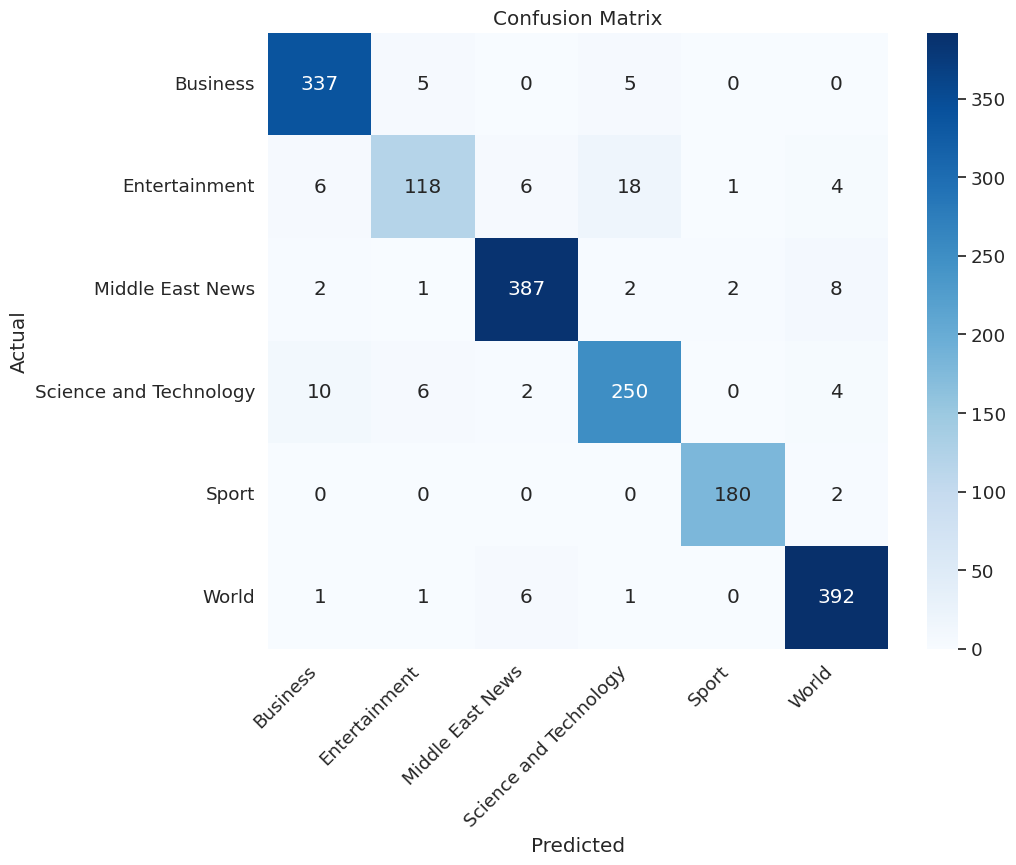

In [15]:
# Class names
class_names = df.category.unique()

# Plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(validation[:], annot=True, cmap='Blues', fmt='g',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

**Test the Model for Sentiment Analysis**

In [16]:
# save model using transformers API after partially training
learner.model.save_pretrained('/kaggle/working/my_model')
from transformers import TFAutoModelForSequenceClassification
model = TFAutoModelForSequenceClassification.from_pretrained('/kaggle/working/my_model')

In [17]:
train_neg = pd.read_csv("/kaggle/input/my-data/train_Arabic_tweets_negative_20190413.tsv", sep="\t", header=None)
train_neg.rename(columns={0:'label', 1:'tweet'}, inplace=True)
train_neg['label'] = 0

train_pos = pd.read_csv("/kaggle/input/my-data/train_Arabic_tweets_positive_20190413.tsv", sep="\t", header=None)
train_pos.rename(columns={0:'label', 1:'tweet'}, inplace=True)
train_pos['label'] = 1


train_df = pd.concat([train_neg, train_pos], axis=0).reset_index(drop=True)

In [18]:
test_pos = pd.read_csv("/kaggle/input/my-data/test_Arabic_tweets_positive_20190413.tsv", sep="\t", header=None)
test_pos.rename(columns={0:'label', 1:'tweet'}, inplace=True)
test_pos['label']=1

test_neg = pd.read_csv("/kaggle/input/my-data/test_Arabic_tweets_positive_20190413.tsv", sep="\t", header=None)
test_neg.rename(columns={0:'label', 1:'tweet'}, inplace=True)
test_neg['label']=0

test_df = pd.concat([test_neg, test_pos], axis=0).reset_index(drop=True)

In [19]:
!pip install nltk Arabic-Stopwords PyArabic Tashaphyne

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 17.0 MB/s eta 0:00:00


In [20]:
!pip install Arabic-Stopwords

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [21]:
nltk.download('stopwords')

NameError: name 'nltk' is not defined

In [ ]:
import string
import re
import regex
import nltk
from nltk.corpus import stopwords # Stopwords
import arabicstopwords.arabicstopwords as stp #more of arabic stop words
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from tashaphyne.stemming import ArabicLightStemmer

In [ ]:
arabic_stopwords = stopwords.words("arabic")

In [ ]:
def Arabic_Light_Stemmer(text):
    #making an object
    Arabic_Stemmer = ArabicLightStemmer()

    #stemming each word
    text=[Arabic_Stemmer.light_stem(y) for y in text.split()]

    return " " .join(text)

def normalizeArabic(text):
    text = text.strip()
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)

    #remove repetetions
    text = re.sub("[إأٱآا]", "ا", text)
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('ييي', 'ي')
    text = text.replace('اا', 'ا')

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)

    # Remove longation
    text = re.sub(r'(.)\1+', r"\1\1", text)

    #Strip vowels from a text, include Shadda.
    text = araby.strip_tashkeel(text)

    #Strip diacritics from a text, include harakats and small lettres The striped marks are
    text = araby.strip_diacritics(text)
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_non_arabic(text):
    text = re.sub('[A-Za-z]+',' ',text)
    return text

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def remove_extra_Space(text):
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    return  " ".join(text.split())

def remove_hashtages_and_mentions(text):
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    return text

def replace_random_text(text):
    text = text.replace('\u202c', '')
    text = text.replace('\u202e', '')
    text = text.replace('\u202d', '')
    return text

def remove_stopwords_robustly(text):
    # Split the text into words
    words = text.split()

    # Remove stop words
    filtered_words = [word for word in words if word not in stp.stopwords_list()]

    # Join the filtered words back into a string
    filtered_text = ' '.join(filtered_words)

    return filtered_text

def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in arabic_stopwords]
    return " ".join(Text)

In [ ]:
train_df.sample(12)

In [ ]:
def preprocess_text(text):
    text = normalizeArabic(text)
    text = Removing_non_arabic(text)
    text = Removing_numbers(text)
    text = Removing_punctuations(text)
    text = remove_extra_Space(text)
    text = remove_hashtages_and_mentions(text)
    text = remove_stop_words(text)
    text = Arabic_Light_Stemmer(text)
    return text

In [ ]:
train_df['tweet'] = train_df['tweet'].apply(preprocess_text)

In [ ]:
train_df.sample(12)

In [ ]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
train_df['tweet'] = train_df['tweet'].apply(preprocess_text)

In [ ]:
train_df['tweet'] = train_df['tweet'].apply(remove_emojis)

In [ ]:
train_df.sample(10)

In [ ]:
mapping = {
    0: "negative",
    1: "positive",
}
train_df['label'] = train_df['label'].map(mapping)
train_df.label.unique()

In [ ]:
X = train_df['tweet']
y = train_df['label']
X_train, X_test , y_train,y_test = train_test_split(np.array(X),np.array(y),test_size=0.2, random_state=0,stratify=y)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

In [ ]:
t = text.Transformer(MODEL_NAME, maxlen=128)
train = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

In [ ]:
model = t.get_classifier(metrics=['accuracy'])
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=32)
learner.fit_onecycle(5e-5,10)

In [ ]:
validation_test_df = learner.validate(class_names=t.get_classes())
validation_test_df